<a href="https://colab.research.google.com/github/AamirJafaq/Sales-Forecasting-Description/blob/main/Sales_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4

* Dataset (Recommended): Walmart Sales Forecast (Kaggle)
* Predict future sales based on historical sales data
* Create time-based features (day, month, lag values)
* Apply regression models to forecast next period's sales
* Plot actual vs. predicted values over time

## Linear Regression Model

In [26]:
import pandas as pd
import numpy as np

In [27]:
data=pd.read_csv("https://raw.githubusercontent.com/AamirJafaq/Sales-Forecasting-Description/refs/heads/main/Walmart.csv")
data.head(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
95,1,02-12-2011,1584083.95,0,48.91,3.172,218.714733,7.866
96,1,09-12-2011,1799682.38,0,43.93,3.158,218.961846,7.866
97,1,16-12-2011,1881176.67,0,51.63,3.159,219.179453,7.866
98,1,23-12-2011,2270188.99,0,47.96,3.112,219.357722,7.866


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Notice that the daatatype of Date column is object. So, it need to be change to datetime datatype.

In [29]:
data["Date"]=pd.to_datetime(data["Date"], dayfirst=True)
data["Date"].head()

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


In [30]:
data.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


None of the values in the dataset is null or missing.

In [31]:
data["Year"]=data["Date"].dt.year
data["Day"]=data["Date"].dt.day
data["Month"]=data["Date"].dt.month

In [32]:
data["1Week_Ago_Sales"]=data["Weekly_Sales"].shift(1)
data["2Week_Ago_Sales"]=data["Weekly_Sales"].shift(2)

In [33]:
data.fillna(0, inplace=True)

Now, extract the features columns and target column.

In [34]:
X=data[["Store", "1Week_Ago_Sales", "Fuel_Price", "2Week_Ago_Sales",  "Day", "Month", "Year", "Unemployment"]]
y=data["Weekly_Sales"]

In [54]:
X = X.sort_values(by=["Store",'Year', 'Month', 'Day'])
X.head()

,Store,1Week_Ago_Sales,Fuel_Price,2Week_Ago_Sales,Day,Month,Year,Unemployment
0,1,-1.973616,2.572,-1.972452,5,2,2010,8.106
1,1,0.855195,2.548,-1.972452,12,2,2010,8.106
2,1,0.852211,2.514,0.855226,19,2,2010,8.106
3,1,0.800599,2.561,0.852244,26,2,2010,8.106
4,1,0.452541,2.625,0.800652,5,3,2010,8.106


Now, split the dataset into training and test. Here we cannot use train_test_split() because the data is time dependent so ordering matters.

In [37]:
split_index = int(len(data)*0.75)
X_train=X.iloc[0: split_index]
y_train=y.iloc[0: split_index]

In [38]:
X_test=X.iloc[split_index:]
y_test=y.iloc[split_index:]

In [39]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [40]:
X_scale=StandardScaler()
y_scale=StandardScaler()
X_train.loc[:, ["1Week_Ago_Sales", "2Week_Ago_Sales"]] = X_scale.fit_transform(X_train[["1Week_Ago_Sales", "2Week_Ago_Sales"]])
y_train = y_scale.fit_transform(y_train.values.reshape(-1,1)).flatten()

In [41]:
X_test.loc[:, ["1Week_Ago_Sales", "2Week_Ago_Sales"]]=X_scale.transform(X_test[["1Week_Ago_Sales", "2Week_Ago_Sales"]])
y_test = y_scale.transform(y_test.values.reshape(-1,1)).flatten()

In [42]:
from sklearn.linear_model import LinearRegression
from decimal import Decimal

In [43]:
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [44]:
np.set_printoptions(suppress=True, formatter={'float_kind': "{:.2f}".format})

In [45]:
y_pred=linear_model.predict(X_test)
y_pred_actual=y_scale.inverse_transform(y_pred.reshape(-1,1))
y_actual=y_scale.inverse_transform(y_test.reshape(-1,1))

In [46]:
# These are the actual prediction values got after inverse scaling.
y_pred_actual

array([[1040889.60],
       [1017958.14],
       [969832.18],
       ...,
       [747879.71],
       [736549.60],
       [706654.35]])

Calculating the performace metrics such as R2 Score and Mean Squared Error for Linear Regression Model.

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
print("R2 for Linear Regression :", r2_score(y_test, y_pred))
print("Mean Square Error for Linear Regression:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 for Linear Regression : 0.8960196241640745
Mean Square Error for Linear Regression: 0.20901338856271873


Notice that R2 score is close to 1. It means the model predicts well.

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

## Visualization

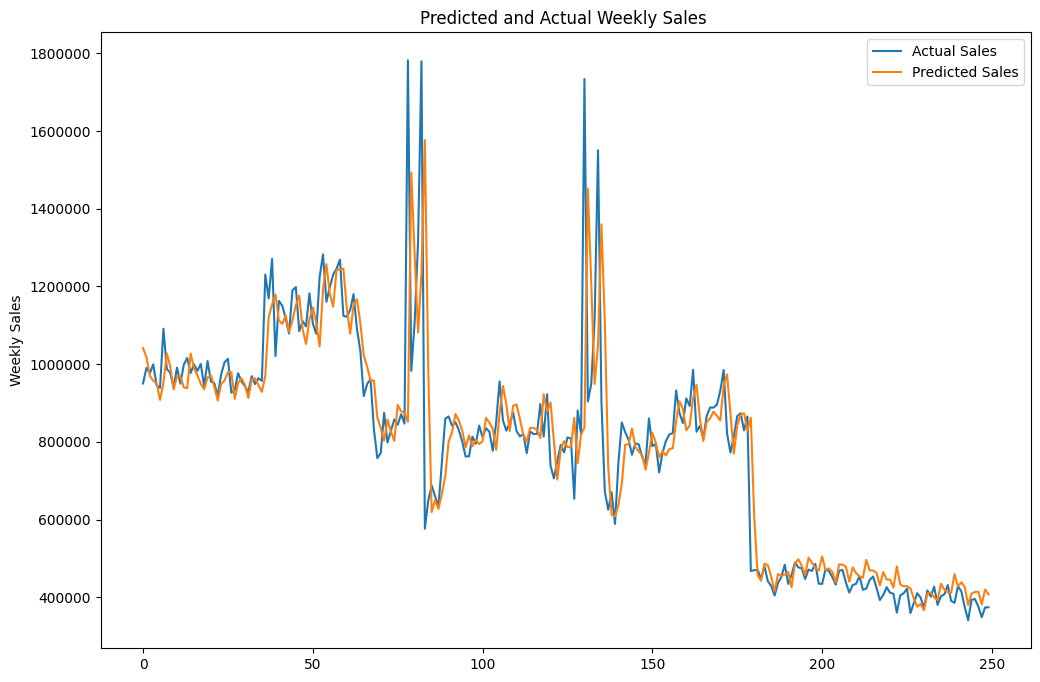

In [53]:
plt.figure(figsize=(12,8))
plt.plot(y_actual[:250], label="Actual Sales")
plt.plot(y_pred_actual[:250], label="Predicted Sales")
plt.ylabel("Weekly Sales")
plt.title("Predicted and Actual Weekly Sales ")
plt.gca().ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()